In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import os

2024-07-11 12:32:37.349118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 12:32:37.359209: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 12:32:37.418536: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 12:32:37.493523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 12:32:37.621338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
gpus=tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
data_dir='data'
# loop over all the images
os.listdir(os.path.join(data_dir,'happy'))

['very-happy-people.jpg',
 'maxresdefault2.jpg',
 'happy-people-group-fb.jpg',
 'image26.jpeg',
 'maxresdefault.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'image22.jpeg',
 'image9.jpeg',
 '1920px-face-smile.svg_.png',
 'image27.jpeg',
 'hology-happy-people-young-woman-running-multicolored-balloons-beach-71974216.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 'images.jpg',
 'happy-people2.jpg',
 'aa-happy-people.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'images3.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'happy-people.png',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'friends-happy-190821-1490x838.jpg',
 'MV5BZjYwNTc1M2MtM2YxMi00YzYyLTkxY2ItY2I3OWE3NDBmNDVmXkEyXkFqcGdeQXVyMjkwOTAyMDU._V1_.jpg',
 'image14.jpeg',
 'Successful-year.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'Happy_guy.jpg',
 'freedom-serenity-concept-female-model-ecstatic-e

In [4]:
# import open cv and imghdr to clean images
import cv2 
import imghdr # checks extensions of each image
from matplotlib import pyplot as plt
image_exts=['jpeg','jpg','bmp','png']


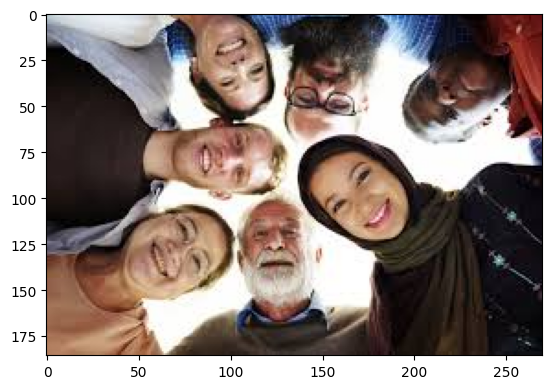

In [5]:
#open image using opencv(cv2)
img=cv2.imread(os.path.join('data','happy','images2.jpg'))
#img has image in form of numpy arrays

# opencv reads in BGR while pyplot expects rgb. 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
#script to remove images with other extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in exts list: {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

# Loading the data using keras

In [7]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)
# can set the batch size and other paramers
# it pre process the data and resizes them as well
# labels are also assigned automatically]

Found 176 files belonging to 2 classes.


In [8]:
data_iterator=data.as_numpy_iterator()
#gives next batch
batch=data_iterator.next()
print(type(data))


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [9]:
import numpy as np

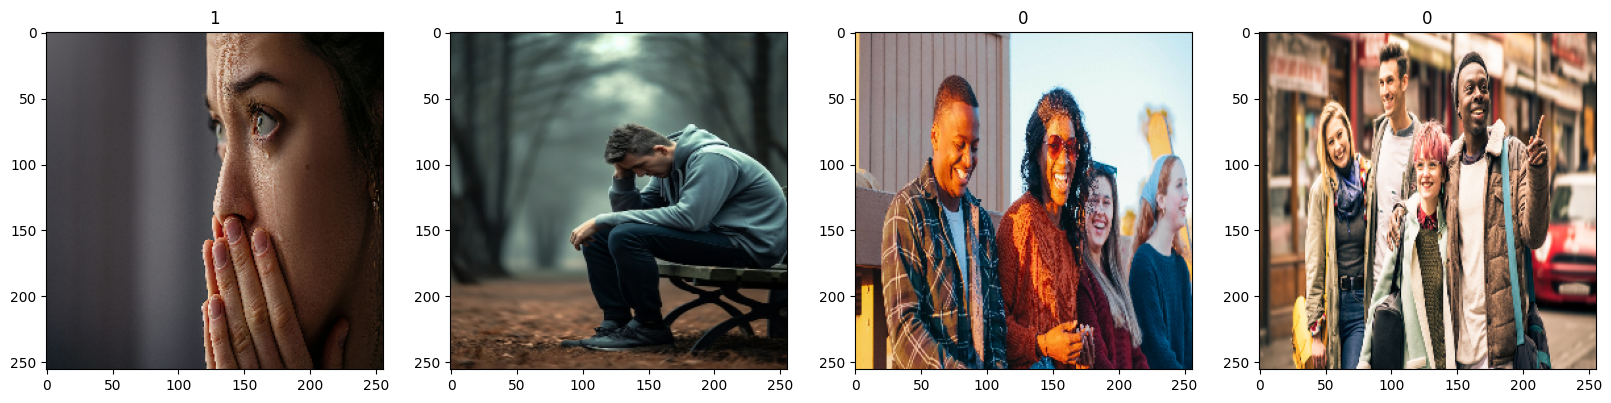

In [10]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 0 is Happy
# 1 is Sad

# Preprocessing Data

In [11]:
# sacle data between 0 and 1
data=data.map(lambda x,y:(x/255,y))

# split in train,dev and test sets



In [12]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
print(batch[0].max())
# always check

1.0


In [13]:
# split data
len(data)
train_size=int(len(data)*0.70)
val_size=int(len(data)*0.20)
test_size=int(len(data)*0.10)+1
print(train_size)
print(val_size)
print(test_size)

4
1
1


In [14]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

print(type(data))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


# Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [18]:
model=Sequential()


In [19]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




/home/salman/Desktop/Computer Vision project/CNN-image-classifier/image_classification_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step - accuracy: 0.5500 - loss: 0.6621 - val_accuracy: 0.7188 - val_loss: 0.5753
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 721ms/step - accuracy: 0.7667 - loss: 0.5477 - val_accuracy: 0.6875 - val_loss: 0.6297
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 901ms/step - accuracy: 0.7542 - loss: 0.4381 - val_accuracy: 0.8750 - val_loss: 0.4521
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 0.7667 - loss: 0.4201 - val_accuracy: 0.7812 - val_loss: 0.3650
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 634ms/step - accuracy: 0.9490 - loss: 0.2545 - val_accuracy: 0.9062 - val_loss: 0.3088
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.9240 - loss: 0.2867 - val_accuracy: 0.9688 - val_loss: 0.1286
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 885ms/step - accuracy: 0.9521 - loss: 0.2031 - val_accuracy: 0.9688 - val_loss: 0.1161
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 736ms/step - accuracy: 0.9396 - loss: 0.1936 - val_accuracy: 1.0000 - val_loss:

In [24]:
hist.history

{'accuracy': [0.59375,
  0.7890625,
  0.765625,
  0.7734375,
  0.9453125,
  0.9140625,
  0.9375,
  0.9453125,
  0.9609375,
  0.9921875,
  0.984375,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6435968279838562,
  0.5296094417572021,
  0.45077598094940186,
  0.42964234948158264,
  0.27729183435440063,
  0.26774686574935913,
  0.22565583884716034,
  0.18246513605117798,
  0.139693945646286,
  0.06467530131340027,
  0.07641119509935379,
  0.047033149749040604,
  0.025326142087578773,
  0.022319355979561806,
  0.009584828279912472,
  0.006632091477513313,
  0.006139751523733139,
  0.0024979503359645605,
  0.0013316493714228272,
  0.001126950024627149],
 'val_accuracy': [0.71875,
  0.6875,
  0.875,
  0.78125,
  0.90625,
  0.96875,
  0.96875,
  1.0,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5753003358840942,
  0.629686713218689,
  0.4521474838256836,
  0.3649563193321228,
  0.3087641596794

# Plotting

In [27]:
# tensorboard --logdir=logs
# run this in terminal

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1983852640.py, line 1)

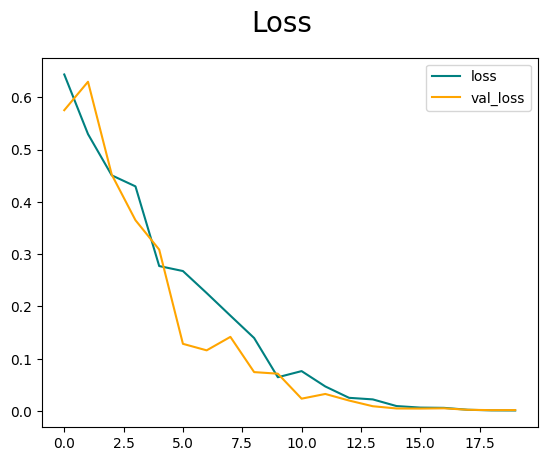

In [28]:
fig=plt.figure()
plt.plot(hist.history["loss"],color="teal",label="loss")
plt.plot(hist.history['val_loss'],color="orange",label="val_loss")
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

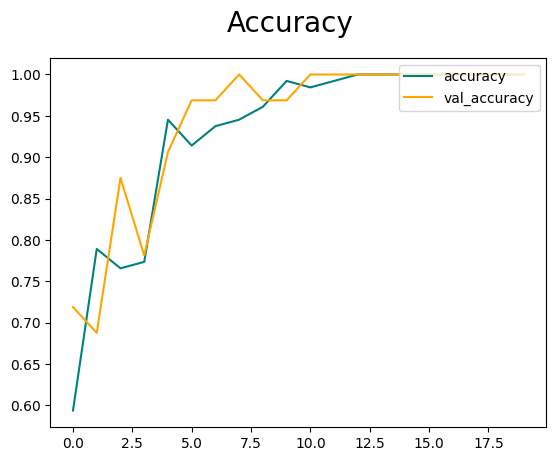

In [29]:
fig=plt.figure()
plt.plot(hist.history["accuracy"],color="teal",label="accuracy")
plt.plot(hist.history['val_accuracy'],color="orange",label="val_accuracy")
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper right")
plt.show()

# Test

In [30]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [31]:
prec=Precision()
rec=Recall()
acc=Accuracy()

In [33]:
len(test)

1

In [36]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    prec.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


2024-07-11 13:19:24.552557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
print(f"Precision={prec.result().numpy()} Recall={rec.result().numpy()} Accuracy={acc.result().numpy()}")

Precision=1.0 Recall=1.0 Accuracy=0.0


In [39]:
import cv2

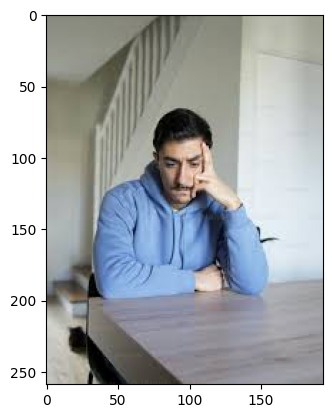

In [54]:
img=cv2.imread('sadtest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
#  put inside a batch
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [57]:
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.5133306]]


# Save the model

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','happysadmodel.h5'))

In [62]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [64]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,627 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.5133306]], dtype=float32)